### Project 1 [Spam-Filter]
Type project: Individual

**Deadline**:11.12.2025 23:59:00

Max possible score: 80

You are provided with a dataset of SMS messages classified as spam and non-spam, ```spam.csv```.

**Goal:** Build a model that will classify a message as spam/non-spam using the Naive Bayes algorithm.

Please review the ```dataset.py``` and ```model.py``` modules.

Message classification accuracy should be greater than 95% for both the validation and test datasets.

In [1]:
# your code for testing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from dataset import Dataset
from model import Model

# Настройка стиля графиков
plt.style.use('ggplot')

In [2]:
try:
    df = pd.read_csv('spam.csv', encoding='latin-1')
    # Обработка стандартной структуры датасета (v1=label, v2=text)
    if 'v1' in df.columns:
        X = df['v2'].values
        y = df['v1'].values
    else:
        X = df.iloc[:, 1].values
        y = df.iloc[:, 0].values
    print(f"Dataset loaded successfully. Shape: {df.shape}")
except FileNotFoundError:
    print("Error: 'spam.csv' not found. Please upload the dataset.")

Dataset loaded successfully. Shape: (5572, 5)


In [3]:
# Инициализация и разделение данных
ds = Dataset(X, y)
ds.split_dataset(val=0.1, test=0.1)

# Обучение модели (Naive Bayes с Laplace smoothing)
model = Model(alpha=1.0)
model.fit(ds)

# Получение метрик
val_accuracy = model.validation()
test_accuracy = model.test()

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy:       {test_accuracy:.4f}")

Validation Accuracy: 0.9820
Test Accuracy:       0.9803


In [4]:
# Сбор предсказаний для тестовой выборки
X_test, y_test_indices = ds.test
y_true = [ds.num2label[idx] for idx in y_test_indices]
y_pred = [model.inference(msg) for msg in X_test]

print("Classification Report:")
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       475
        spam       0.91      0.96      0.93        82

    accuracy                           0.98       557
   macro avg       0.95      0.97      0.96       557
weighted avg       0.98      0.98      0.98       557



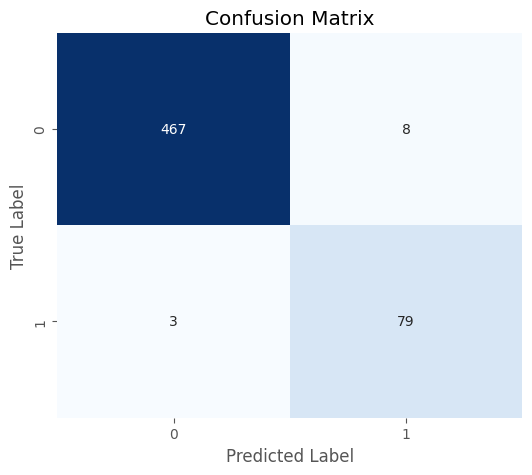

In [5]:
# Построение Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=["ham", "spam"])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

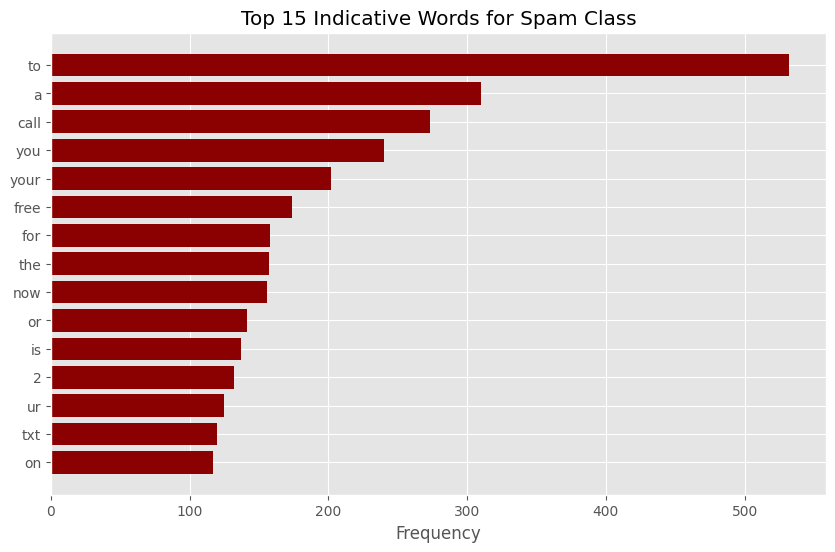

In [6]:
# Анализ наиболее частотных слов в спаме
spam_words = sorted(model.spam.items(), key=lambda x: x[1], reverse=True)[:15]
words = [w[0] for w in spam_words]
counts = [w[1] for w in spam_words]

plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='darkred')
plt.xlabel('Frequency')
plt.title('Top 15 Indicative Words for Spam Class')
plt.gca().invert_yaxis()
plt.show()

Running Grid Search for Alpha...
Alpha: 0.1 -> Validation Acc: 0.9803
Alpha: 0.5 -> Validation Acc: 0.9785
Alpha: 1.0 -> Validation Acc: 0.9820
Alpha: 1.5 -> Validation Acc: 0.9803
Alpha: 2.0 -> Validation Acc: 0.9749
Alpha: 5.0 -> Validation Acc: 0.9605


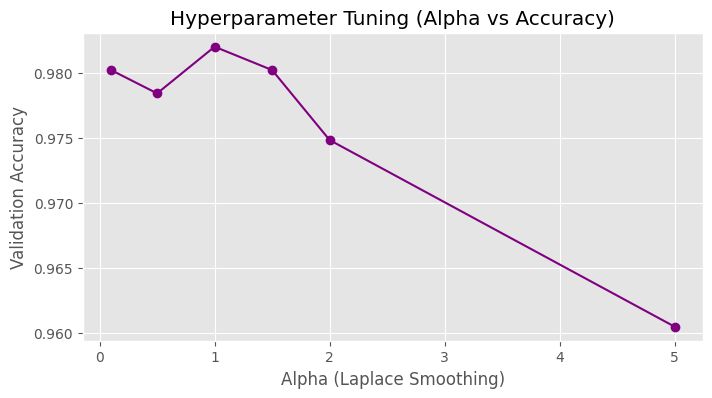

Optimal Alpha found: 1.0


In [9]:
# Эксперимент: Подбор оптимального Alpha
alphas = [0.1, 0.5, 1.0, 1.5, 2.0, 5.0]
val_scores = []

print("Running Grid Search for Alpha...")
for a in alphas:
    temp_model = Model(alpha=a)
    temp_model.fit(ds)
    score = temp_model.validation()
    val_scores.append(score)
    print(f"Alpha: {a} -> Validation Acc: {score:.4f}")

# Визуализация результатов эксперимента
plt.figure(figsize=(8, 4))
plt.plot(alphas, val_scores, marker='o', linestyle='-', color='purple')
plt.title('Hyperparameter Tuning (Alpha vs Accuracy)')
plt.xlabel('Alpha (Laplace Smoothing)')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

best_alpha = alphas[np.argmax(val_scores)]
print(f"Optimal Alpha found: {best_alpha}")

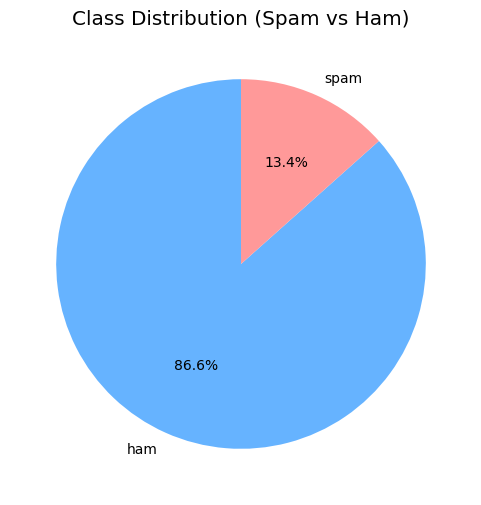

Total samples: 5572
Ham count: 4825
Spam count: 747


In [11]:
# EDA: Распределение классов
unique, counts = np.unique(y, return_counts=True)
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=unique, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
plt.title('Class Distribution (Spam vs Ham)')
plt.show()

print(f"Total samples: {len(y)}")
print(f"Ham count: {counts[0]}")
print(f"Spam count: {counts[1]}")

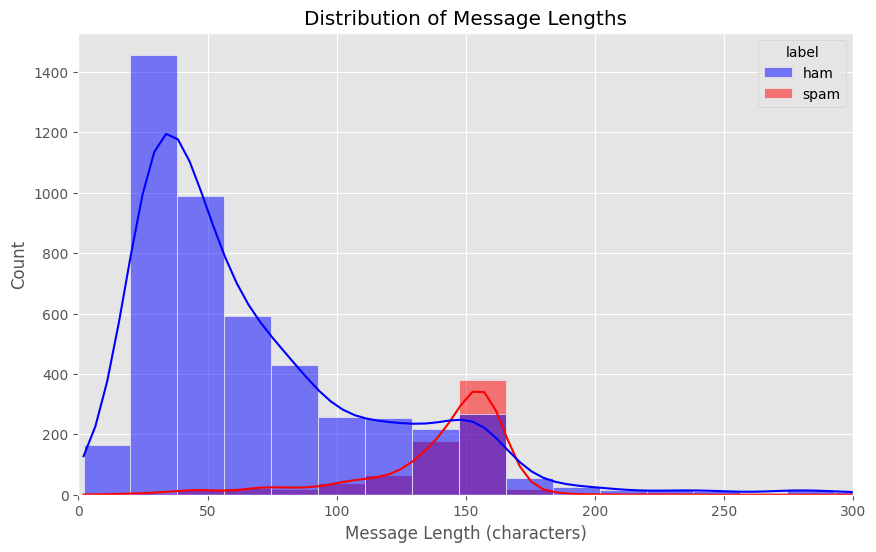

In [12]:
# EDA: Анализ длины сообщений
# Создаем временные массивы длин
doc_lengths = [len(doc) for doc in X]
df_temp = pd.DataFrame({'length': doc_lengths, 'label': y})

plt.figure(figsize=(10, 6))
sns.histplot(data=df_temp, x='length', hue='label', bins=50, kde=True, palette={'ham': 'blue', 'spam': 'red'})
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length (characters)')
plt.xlim(0, 300)
plt.show()

In [8]:
def predict_message(msg):
    prediction = model.inference(msg)
    print(f"Input: '{msg}'\nPrediction: {prediction}\n" + "-"*30)

predict_message("IMPORTANT - You have been selected to receive a £1000 cash prize. Call 09066361918 to claim now.")

predict_message("I'll be at the office around 10 am. See you then.")

predict_message("Your Apple ID has been locked due to unauthorized login attempts. Verify your identity at http://apple-security-verify.com")

predict_message("Did you finish the report for tomorrow?")

predict_message("Shop now! 50% off on all items. Use code SAVE50 at checkout. Reply STOP to unsubscribe.")

Input: 'IMPORTANT - You have been selected to receive a £1000 cash prize. Call 09066361918 to claim now.'
Prediction: spam
------------------------------
Input: 'I'll be at the office around 10 am. See you then.'
Prediction: ham
------------------------------
Input: 'Your Apple ID has been locked due to unauthorized login attempts. Verify your identity at http://apple-security-verify.com'
Prediction: spam
------------------------------
Input: 'Did you finish the report for tomorrow?'
Prediction: ham
------------------------------
Input: 'Shop now! 50% off on all items. Use code SAVE50 at checkout. Reply STOP to unsubscribe.'
Prediction: spam
------------------------------
